@author karlieswift

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['gender_submission.csv', 'test.csv', 'train.csv']


## 一 数据分析篇
### 1——预处理

In [2]:
#导入必要的数据包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
#查看文件夹下的文件
print(os.listdir('../input'))

['gender_submission.csv', 'test.csv', 'train.csv']


In [3]:
train_data=pd.read_csv("../input/train.csv")
test_data=pd.read_csv("../input/test.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_data['Age'].isnull().sum()

177

In [5]:
#查看数据的键值
print(train_data.keys())
print(train_data.columns)
print(test_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
pd.isnull(train_data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
pd.isnull(test_data).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 发现数据age 和 Cabin,Embarked有缺少值 

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#处理缺失值
train_data.drop(labels=['Ticket','Cabin'],axis=1,inplace=True)
test_data.drop(labels=['Ticket','Cabin'],axis=1,inplace=True)

In [11]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [12]:
pd.isnull(train_data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [13]:
pd.isnull(test_data).sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


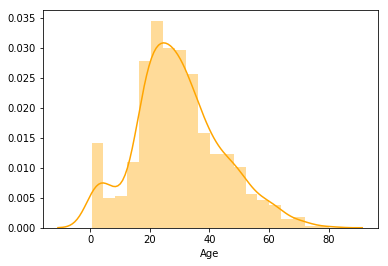

In [14]:
age_train_data=train_data['Age'].copy()
age_train_data.dropna(inplace=True)
sns.distplot(age_train_data,color='orange')

In [15]:
print(pd.isnull(train_data).sum())
print(pd.isnull(test_data).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [16]:
print(train_data["Embarked"].describe())
print(train_data["Embarked"].unique())

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
['S' 'C' 'Q' nan]


In [17]:
print(test_data["Fare"].describe())

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64


In [18]:
#处理缺失值
train_data["Age"].fillna(train_data["Age"].median(), inplace = True)
test_data["Age"].fillna(test_data["Age"].median(), inplace = True)
train_data["Embarked"].fillna("S", inplace = True)
test_data["Fare"].fillna(test_data["Fare"].mean(), inplace = True)

In [19]:
print(pd.isnull(train_data).sum())
print("*"*66)
print(pd.isnull(test_data).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
******************************************************************
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


### 2——可视化分析 

In [20]:
#目前训练的数据特征
train_data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [21]:
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


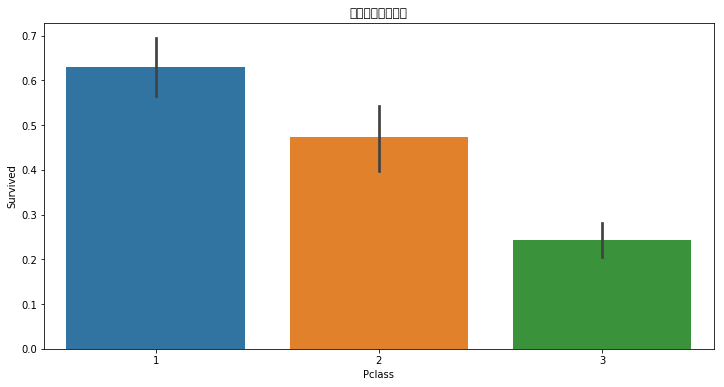

In [22]:
#等级Pclass
fig,ax1=plt.subplots(figsize=(12,6))
sns.barplot(x='Pclass',y='Survived',data=train_data,ax=ax1)
fig=plt.title("船舱等级与幸存率")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


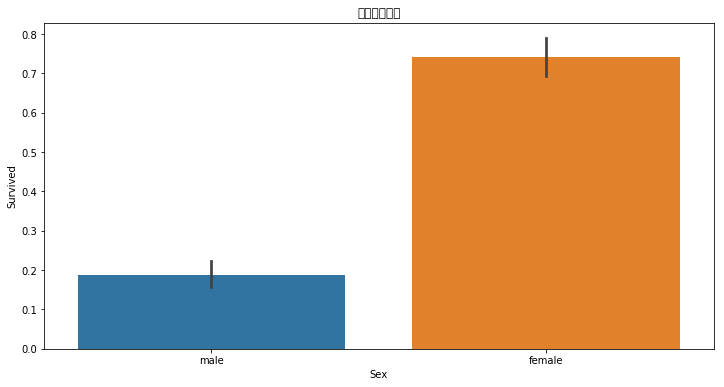

In [23]:
#等级Pclass
fig,ax1=plt.subplots(figsize=(12,6))
sns.barplot(x='Sex',y='Survived',data=train_data,ax=ax1)
fig=plt.title("性别与幸存率")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


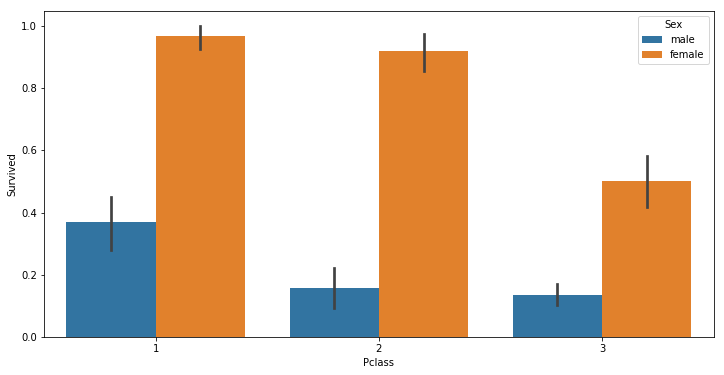

In [24]:
fig,ax1=plt.subplots(figsize=(12,6))
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train_data,ax=ax1)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


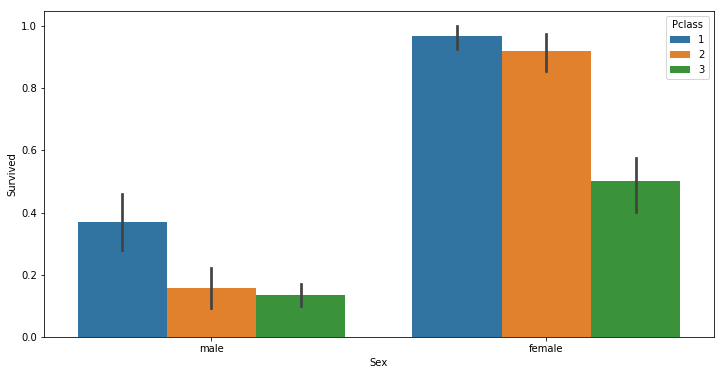

In [25]:
fig,ax1=plt.subplots(figsize=(12,6))
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=train_data,ax=ax1)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


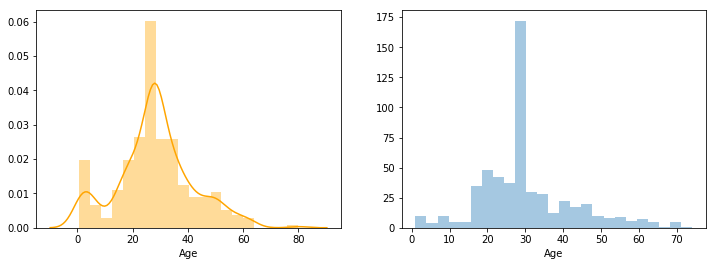

In [26]:
survived_age = train_data[train_data.Survived == 1]["Age"]
no_survived_age = train_data[train_data.Survived == 0]["Age"]
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,4))
sns.distplot(survived_age,ax=ax1,color='orange')
sns.distplot(no_survived_age,ax=ax2,kde=False)

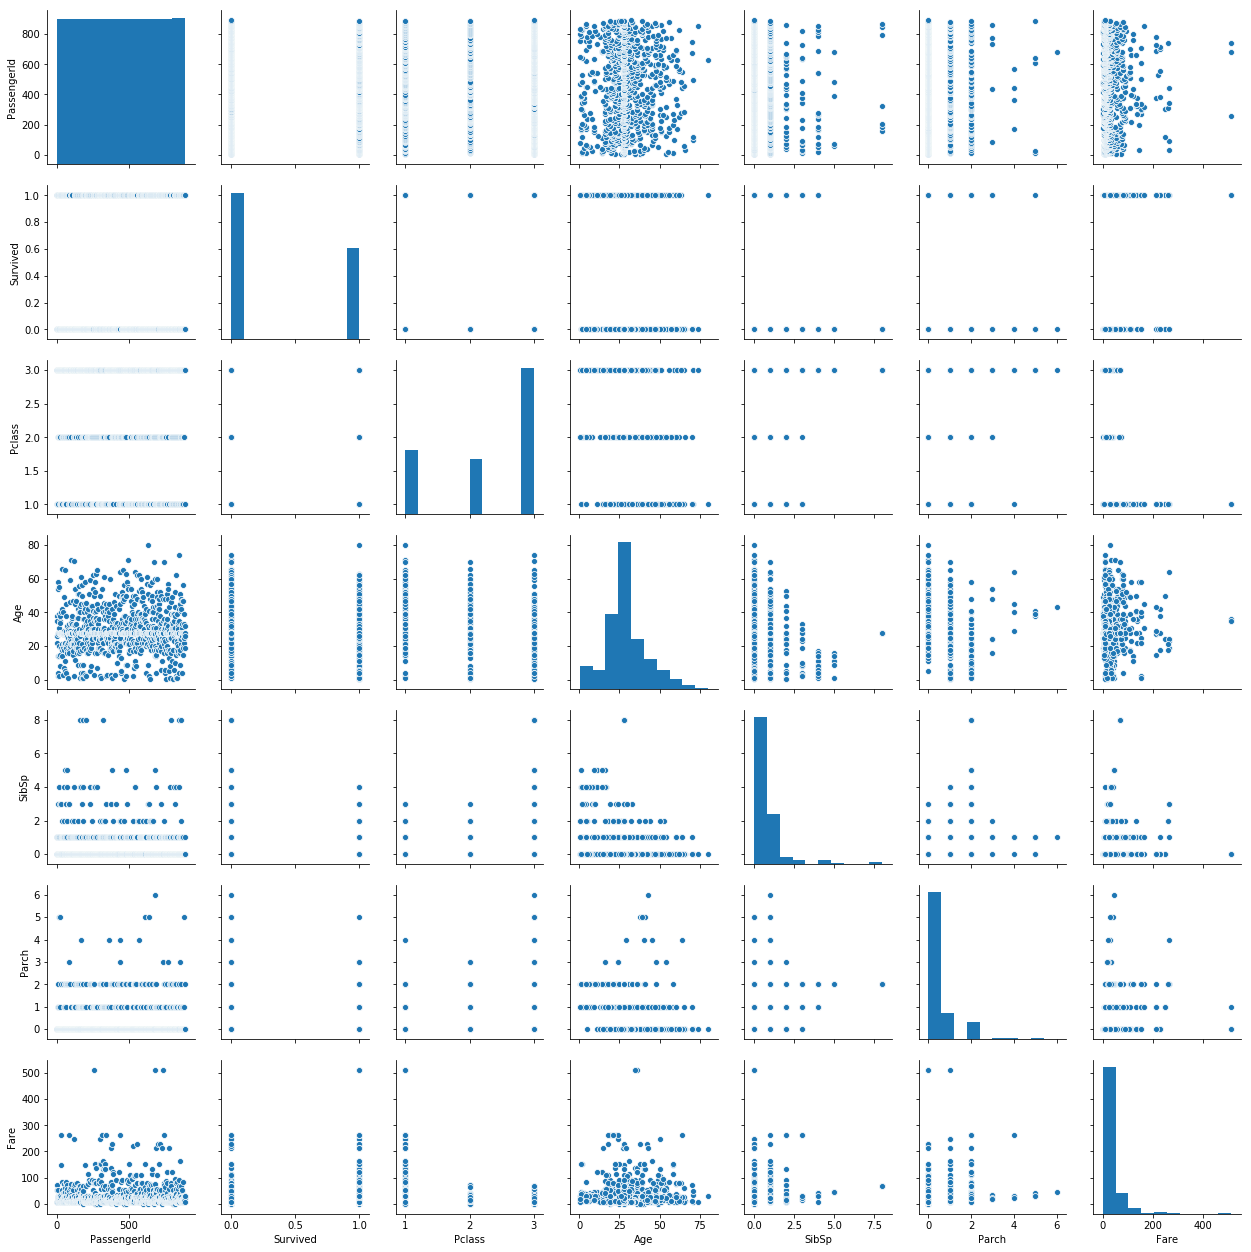

In [27]:
sns.pairplot(train_data)

### 3——特征工程 
######  处理一些字符数据，便于矩阵运算

In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [29]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [30]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [32]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
#Embarked
label_encoder.fit(train_data['Embarked'])
train_data['Embarked']=label_encoder.transform(train_data['Embarked'])

label_encoder.fit(test_data['Embarked'])
test_data['Embarked']=label_encoder.transform(test_data['Embarked'])
#Sex
label_encoder.fit(train_data['Sex'])
train_data['Sex']=label_encoder.transform(train_data['Sex'])

label_encoder.fit(test_data['Sex'])
test_data['Sex']=label_encoder.transform(test_data['Sex'])

In [34]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# 二 算法比较

In [35]:
score=[]
name=[]

In [36]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
train_data['Age']=standard.fit_transform(np.array(train_data['Age']).reshape(-1,1))
test_data['Age']=standard.fit_transform(np.array(test_data['Age']).reshape(-1,1))

train_data['Fare']=standard.fit_transform(np.array(train_data['Fare']).reshape(-1,1))
test_data['Fare']=standard.fit_transform(np.array(test_data['Fare']).reshape(-1,1))

In [37]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,-0.502445,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,0.786845,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,-0.488854,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,0.420730,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,-0.486337,2


In [38]:
#数据划分和没用的数据特征去除
train_y=train_data['Survived']
train_X=train_data.drop(['PassengerId','Survived','Name'],axis=1)
PassengerId=test_data['PassengerId']
test_data=test_data.drop(['PassengerId','Name'],axis=1)

In [39]:
train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.565736,1,0,-0.502445,2
1,1,0,0.663861,1,0,0.786845,0
2,3,0,-0.258337,0,0,-0.488854,2
3,1,0,0.433312,1,0,0.420730,2
4,3,1,0.433312,0,0,-0.486337,2


#### 在训练数据里测试

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(train_X,train_y,test_size=0.3,random_state=10)

#### 逻辑回归

In [41]:
%%time
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_param = {
         "penalty": ["l2"],
         "fit_intercept": [True, False], 
         "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
         "max_iter": [50, 100, 200],
         "warm_start": [True, False]
        }

lr_grid = GridSearchCV(lr_clf, lr_param ,n_jobs=-1)
lr_grid.fit(X_train,y_train)
lr_score=lr_grid.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 480 ms, sys: 120 ms, total: 600 ms
Wall time: 5.78 s


In [42]:
lr_grid.best_params_

{'fit_intercept': True,
 'max_iter': 50,
 'penalty': 'l2',
 'solver': 'liblinear',
 'warm_start': True}

In [43]:
#逻辑回归
name.append('LogisticRegression')
score.append(lr_score)
lr_score

0.8097014925373134

### knn

In [44]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

knn_param = {
             "n_neighbors": [3, 5, 10, 15],
             "weights": ["uniform", "distance"],
             "algorithm": ["auto", "ball_tree", "kd_tree"],
             "leaf_size": [20, 30, 50]
             }
knn_grid = GridSearchCV(knn_clf, knn_param ,n_jobs=-1)
knn_grid.fit(X_train,y_train)
knn_score=knn_grid.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 148 ms, sys: 4 ms, total: 152 ms
Wall time: 860 ms


In [45]:
#knn
name.append('KNeighborsClassifier')
score.append(knn_score)
knn_score

0.8208955223880597

In [46]:
knn_grid.best_params_

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'uniform'}

#### 集成学习随机森林

In [47]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()


rf_param = {
    "n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
    "criterion": ["gini", "entropy"], 
    "max_features": ["auto", "sqrt", "log2"], 
    "max_depth": [2, 3, 5, 10], 
    "min_samples_split": [2, 3, 5, 10]
    }
rf_grid = GridSearchCV(rf_clf, rf_param ,n_jobs=-1)
rf_grid.fit(X_train,y_train)
rf_score=rf_grid.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 3.33 s, sys: 92 ms, total: 3.42 s
Wall time: 13.6 s


In [48]:
# 集成算法随机森林
name.append('RandomForestClassifier')
score.append(rf_score)
rf_score

0.8097014925373134

### SVM

In [49]:
%%time
from sklearn.svm import SVC
svm_clf = SVC()


svm_param = {
             "kernel": ["rbf", "linear"],
             "probability": [True, False], 
             "verbose": [True, False]
            }
svm_grid = GridSearchCV(svm_clf, svm_param ,n_jobs=-1)
svm_grid.fit(X_train,y_train)
svm_score=svm_grid.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[LibSVM]CPU times: user 144 ms, sys: 0 ns, total: 144 ms
Wall time: 455 ms


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [50]:
# SVM
name.append('SVM')
score.append(svm_score)
svm_score

0.832089552238806

In [51]:
svm_grid.best_params_

{'kernel': 'rbf', 'probability': True, 'verbose': True}

### 打印表格

In [52]:
pd.DataFrame(score,name)

,0
LogisticRegression,0.809701
KNeighborsClassifier,0.820896
RandomForestClassifier,0.809701
SVM,0.832090


###  可视化比较 

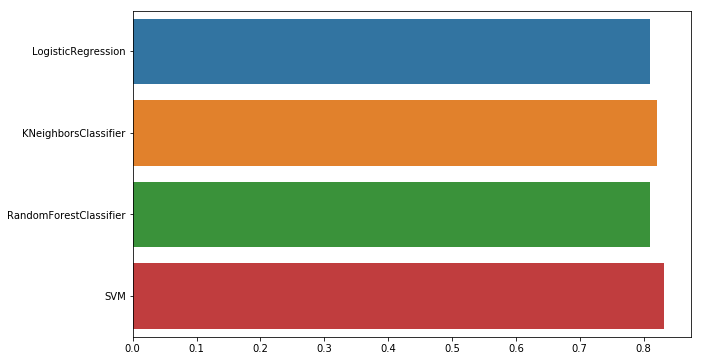

In [53]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x=score,y=name,ax=ax)

In [54]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.386231,0,0,-0.498407,1
1,3,0,1.371370,1,0,-0.513274,2
2,2,1,2.553537,0,0,-0.465088,1
3,3,1,-0.204852,0,0,-0.483466,2
4,3,0,-0.598908,1,1,-0.418471,2


In [55]:
predict=svm_grid.predict(test_data)

In [56]:
predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
result=pd.DataFrame({
    'PassengerId':PassengerId,
    'Survived':predict
})


In [58]:
result.to_csv('predict_data.csv',index=False)